In [1]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.9.0


In [3]:
dataset = pd.read_csv (r'C:\Users\alfen\Downloads\Regression\Data Clean.csv')
print (dataset)

    Umur  Gender Tanggal_konfirmasi Tanggal_sembuh  Demam  Batuk  Kelelahan  \
0     44       0         2020-01-21     2020-01-29      1      0          1   
1     39       0         2020-01-24     2020-02-03      1      0          1   
2     30       1         2020-01-15     2020-01-15      1      1          0   
3     66       1         2020-01-23     2020-02-19      1      1          0   
4     40       1         2020-01-25     2020-02-08      1      1          0   
5     33       1         2020-01-27     2020-01-27      1      0          1   
6      1       0         2020-02-08     2020-02-17      0      0          0   
7     30       0         2020-01-24     2020-02-12      1      1          1   
8     31       1         2020-01-24     2020-02-12      1      1          0   
9     29       1         2020-01-24     2020-01-28      0      0          0   
10    55       1         2020-01-24     2020-02-05      1      0          0   
11    73       1         2020-02-02     2020-02-21  

In [4]:
dataset.drop(['Tanggal_konfirmasi', 'Tanggal_sembuh'], axis = 1, inplace = True) 

In [5]:
dataset

,Umur,Gender,Demam,Batuk,Kelelahan,Sakit_tenggorokan,Pilek,Sesak_napas,Muntah,Lama_hari_sembuh
0,44,0,1,0,1,0,0,0,0,8
1,39,0,1,0,1,0,1,0,0,10
2,30,1,1,1,0,1,0,0,0,0
3,66,1,1,1,0,0,0,0,0,27
4,40,1,1,1,0,0,0,0,0,14
5,33,1,1,0,1,1,0,0,0,0
6,1,0,0,0,0,0,0,0,0,9
7,30,0,1,1,1,0,0,0,0,19
8,31,1,1,1,0,0,0,0,0,19
9,29,1,0,0,0,0,0,0,0,4


In [6]:
dataset = dataset.dropna()

In [7]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

C:\Users\alfen\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


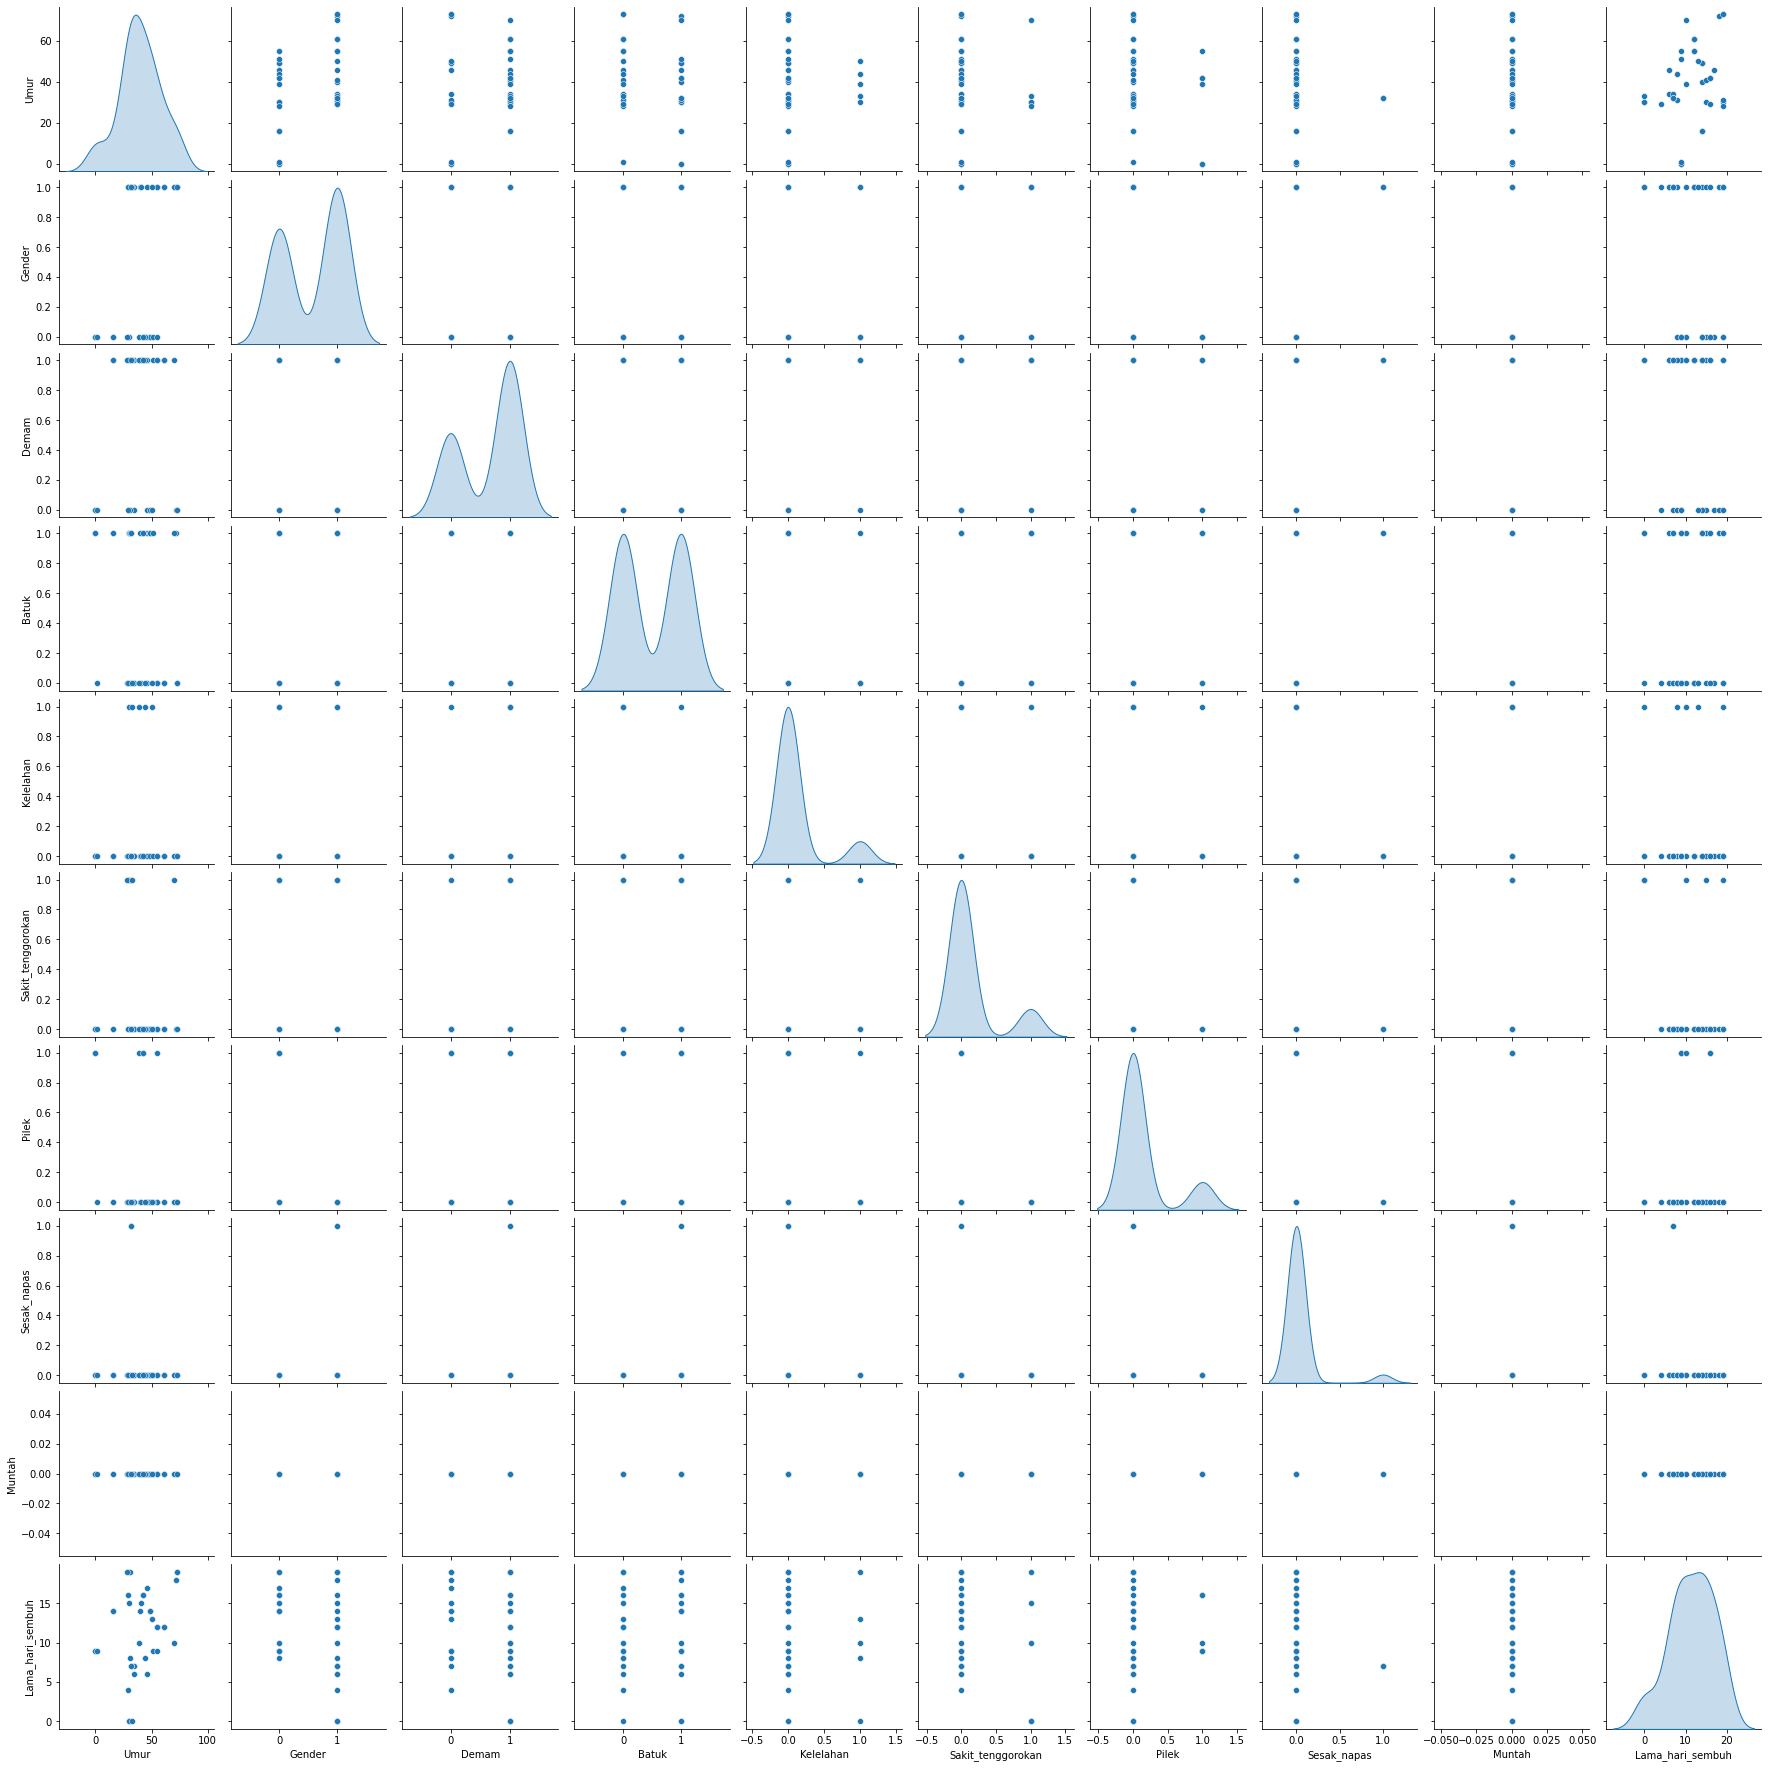

In [8]:
sns.pairplot(train_dataset[['Umur', 'Gender', 'Demam', 'Batuk', 'Kelelahan', 'Sakit_tenggorokan', 'Pilek', 'Sesak_napas', 'Muntah', 'Lama_hari_sembuh']], diag_kind='kde')

In [9]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Umur,40.0,39.500,18.397324,0.0,30.0,39.5,50.25,73.0
Gender,40.0,0.575,0.500641,0.0,0.0,1.0,1.00,1.0
Demam,40.0,0.650,0.483046,0.0,0.0,1.0,1.00,1.0
Batuk,40.0,0.500,0.506370,0.0,0.0,0.5,1.00,1.0
Kelelahan,40.0,0.125,0.334932,0.0,0.0,0.0,0.00,1.0
Sakit_tenggorokan,40.0,0.150,0.361620,0.0,0.0,0.0,0.00,1.0
Pilek,40.0,0.150,0.361620,0.0,0.0,0.0,0.00,1.0
Sesak_napas,40.0,0.050,0.220721,0.0,0.0,0.0,0.00,1.0
Muntah,40.0,0.000,0.000000,0.0,0.0,0.0,0.00,0.0
Lama_hari_sembuh,40.0,11.425,5.329586,0.0,8.0,12.0,15.25,19.0


In [10]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Lama_hari_sembuh')
test_labels = test_features.pop('Lama_hari_sembuh')

In [11]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Umur,39.500,18.397324
Gender,0.575,0.500641
Demam,0.650,0.483046
Batuk,0.500,0.506370
Kelelahan,0.125,0.334932
Sakit_tenggorokan,0.150,0.361620
Pilek,0.150,0.361620
Sesak_napas,0.050,0.220721
Muntah,0.000,0.000000
Lama_hari_sembuh,11.425,5.329586


In [12]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [13]:
normalizer.adapt(np.asarray(train_features))

In [14]:
print(normalizer.mean.numpy())

[[39.5    0.575  0.65   0.5    0.125  0.15   0.15   0.05   0.   ]]


In [15]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[46  1  1  1  0  0  0  0  0]]

Normalized: [[ 0.36  0.86  0.73  1.   -0.38 -0.42 -0.42 -0.23  0.  ]]


In [63]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error', metrics=['mse'],
                optimizer=tf.keras.optimizers.Adam(0.001))
    
  return model

In [64]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_9 (Dense)             (None, 64)                640       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [65]:
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 730ms/step - loss: 11.3970 - mse: 159.8162 - val_loss: 11.6850 - val_mse: 151.3830
Epoch 2/100
1/1 [==============================] - 0s 66ms/step - loss: 11.3391 - mse: 158.2964 - val_loss: 11.6002 - val_mse: 149.4469
Epoch 3/100
1/1 [==============================] - 0s 57ms/step - loss: 11.2814 - mse: 156.7921 - val_loss: 11.5168 - val_mse: 147.5458
Epoch 4/100
1/1 [==============================] - 0s 68ms/step - loss: 11.2241 - mse: 155.3030 - val_loss: 11.4340 - val_mse: 145.6665
Epoch 5/100
1/1 [==============================] - 0s 58ms/step - loss: 11.1674 - mse: 153.8300 - val_loss: 11.3507 - val_mse: 143.7922
Epoch 6/100
1/1 [==============================] - 0s 59ms/step - loss: 11.1104 - mse: 152.3609 - val_loss: 11.2666 - val_mse: 141.9167
Epoch 7/100
1/1 [==============================] - 0s 52ms/step - loss: 11.0533 - mse: 150.8943 - val_loss: 11.1811 - val_mse: 140.0201
Epoch 8/100
1/1 [==============================

Epoch 62/100
1/1 [==============================] - 0s 52ms/step - loss: 5.4035 - mse: 42.7328 - val_loss: 3.7715 - val_mse: 19.1648
Epoch 63/100
1/1 [==============================] - 0s 44ms/step - loss: 5.2814 - mse: 40.9091 - val_loss: 3.6474 - val_mse: 17.6920
Epoch 64/100
1/1 [==============================] - 0s 40ms/step - loss: 5.1571 - mse: 39.1560 - val_loss: 3.5233 - val_mse: 16.3160
Epoch 65/100
1/1 [==============================] - 0s 44ms/step - loss: 5.0498 - mse: 37.4834 - val_loss: 3.4006 - val_mse: 15.0581
Epoch 66/100
1/1 [==============================] - 0s 52ms/step - loss: 4.9453 - mse: 35.9016 - val_loss: 3.2775 - val_mse: 13.9017
Epoch 67/100
1/1 [==============================] - 0s 44ms/step - loss: 4.8388 - mse: 34.4050 - val_loss: 3.1539 - val_mse: 12.8408
Epoch 68/100
1/1 [==============================] - 0s 40ms/step - loss: 4.7303 - mse: 32.9904 - val_loss: 3.0292 - val_mse: 11.8683
Epoch 69/100
1/1 [==============================] - 0s 44ms/step - lo

In [66]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Lama_hari_sembuh]')
  plt.legend()
  plt.grid(True)

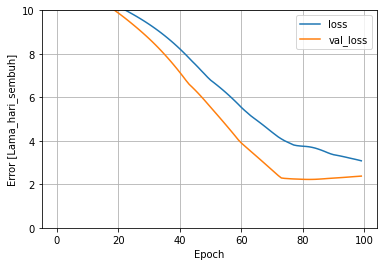

In [67]:
plot_loss(history)

In [68]:
def plot_mse(history):
  plt.plot(history.history['mse'], label='mse')
  plt.plot(history.history['val_mse'], label='val_mse')
  plt.ylim([0, 20])
  plt.xlabel('Epoch')
  plt.ylabel('MSE [Lama_hari_sembuh]')
  plt.legend()
  plt.grid(True)

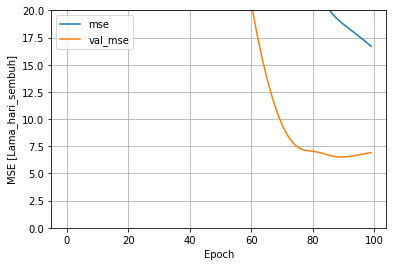

In [69]:
plot_mse(history)

In [98]:
dnn_model.evaluate(test_features, test_labels)

1/1 [==============================] - 0s 32ms/step - loss: 5.8495 - mse: 54.0422


[5.849462032318115, 54.04221725463867]

1/1 [==============================] - 0s 140ms/step


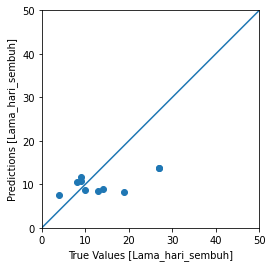

In [72]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Lama_hari_sembuh]')
plt.ylabel('Predictions [Lama_hari_sembuh]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

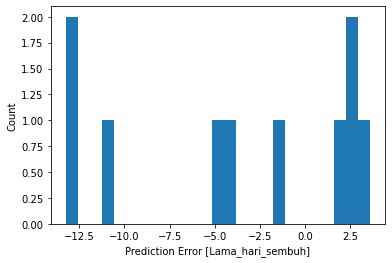

In [73]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Lama_hari_sembuh]')
_ = plt.ylabel('Count')

In [93]:
Lama_hari_sembuh = dnn_model.predict([6,1,1,1,0,1,1,0,0])
print ("Lama hari sembuh: ",Lama_hari_sembuh)
print ("Lama hari sembuh: ",int(Lama_hari_sembuh))

1/1 [==============================] - 0s 48ms/step
Lama hari sembuh:  [[5.3]]
Lama hari sembuh:  5
